In [1]:
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [2]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [3]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

Class:  [9]


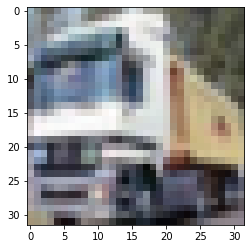

In [4]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[1])
print("Class: ", y_train[1])

Cifar10 classes:

0: airplane										
1: automobile										
2: bird										
3: cat										
4: deer										
5: dog										
6: frog										
7: horse										
8: ship										
9: truck

In [5]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)        2

In [8]:
train_images =x_train.astype('float32')/255
test_images=x_test.astype('float32')/255

In [9]:
from keras.utils.np_utils import to_categorical

train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

In [10]:
val_images=train_images[:10000]
partial_images=train_images[10000:]

val_labels=train_labels[:10000]
partial_labels=train_labels[10000:]

In [11]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam(0.01),metrics=["accuracy"])

In [12]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor= "val_accuracy", patience = 7)

In [13]:
history = model.fit(partial_images, partial_labels, validation_data=(val_images,val_labels), epochs=60, callbacks=[es])

Epoch 1/60
1250/1250 [==============================] - 13s 5ms/step - loss: 1.9861 - accuracy: 0.3056 - val_loss: 1.5153 - val_accuracy: 0.4754
Epoch 2/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3837 - accuracy: 0.5076 - val_loss: 1.2292 - val_accuracy: 0.5767
Epoch 3/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2028 - accuracy: 0.5842 - val_loss: 1.2132 - val_accuracy: 0.5830
Epoch 4/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0907 - accuracy: 0.6231 - val_loss: 1.0334 - val_accuracy: 0.6410
Epoch 5/60
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0221 - accuracy: 0.6505 - val_loss: 1.6815 - val_accuracy: 0.4763
Epoch 6/60
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9710 - accuracy: 0.6674 - val_loss: 0.9321 - val_accuracy: 0.6826
Epoch 7/60
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9120 - accuracy: 0.6943 - val_loss: 0.9326 - val_accuracy

In [14]:
metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.9596 - accuracy: 0.7247


In [15]:
print("Loss: ", metrics[0])
print("Accuracy: ",metrics[1])

Loss:  0.9596204161643982
Accuracy:  0.7246999740600586


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


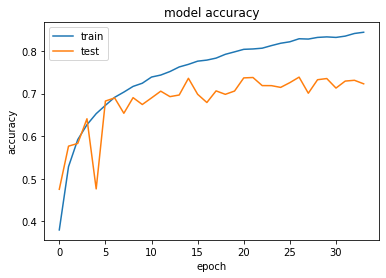

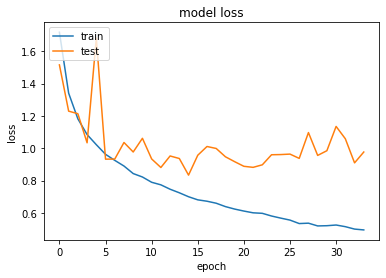

In [16]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()